# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023* 
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Customer Churn - Who to keep and who to let go?

*March 21, 2023*  
Version 2.1


# **Call for Nominations: Recognize a Professor for their Teaching** 

> **Nominate here:** https://tinyurl.com/weatherspoon2023 

![Weatherspoon](https://mapxp.app/BUSI488/Weatherspoon2023.png)


# **Call for Nominations: Recognize a Professor for their Teaching** 

 * The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires.  *William A. Ward*

 * I cannot teach anybody anything; I can only make them think. *Socrates*

 * Tell me and I forget. Teach me and I remember. Involve me and I learn. *Benjamin Franklin*

 > **Nominate here:** https://tinyurl.com/weatherspoon2023

# ***Don't forget to put in YOUR nominations before Monday, March 27th, 2023!***

# Today's Agenda
> Discuss this notebook in your team (Team for TA3) for 40 minutes

1. **What is Customer Churn**
2. **Identify Customers that are at Risk of Churning**
3. **Load and Clean Data**
4. **EDA with Visualization**
5. **Feature Engineering**
6. **Data Preprocessing Pipeline**
7. **Churn Prediction Model**
8. **Making Things Better: Did we overlook something?**
9. **Finalize Model**
10. **Decide Who to Fight for and Who to let Go**
11. **How well did we do?**
12. **What Next?**

> Discuss team findings in class

## Prep-Check:
- Reviewed notebook of class 17
- Ran this entire notebook before class and reflected on the insights it creates

# 1. What is Customer Churn?


![Lab vs Real-World](https://atrium.ai/wp-content/uploads/2021/07/What-stops-customer-churn-Having-a-centralized-data-hub-does-and-heres-why.jpeg)


####***Customer churn***
- customer attrition
- customer turnover
- customer defection

***is the loss of clients or customers***

Firms that have subscription or membership business models usually monitor customer churn closely:

- Banks 
- Telephone service companies
- Internet service providers
- Pay TV companies
- Insurance firms
- Gyms
- etc.   

----------------

####***Customer churn rates*** often a key business metric (along with cash flow, EBITDA (earnings before interest, tax, depreciation), etc.) 
* Cost of retaining an existing customer is far less than acquiring a new one.

-----------------

####Dedicated departments attempt to ***prevent churn*** and ***win back churned customers***   
- long-term customers can be worth more than newly acquired customers 

####***BUT: Competitors*** may make special offers to entice customers away 
- Customers leave in hope of better service or value for money
- ***Switching cost*** can create hurdles

-----------------
#### Important business activity: ***Customer Retention***
- Can be costly -  *why?*
- To focus retention efforts, must understand ***which customers are at risk of churning***.  

  

*Source: definition adapted from Wikipedia.com*

# 2. **Today's Business Challenge:** How to Identify customers that are at risk of churning?
- We will use a dataset that is based on real bank data, but was slightly modified for the purpose of this case study to 
    - preserve real customers privacies  
    - preserve the bank's privacy  
    - allow for richer analysis  

###**The Bank's Problem:** Decide on retention measures for right customers.

- What question(s) are we trying to answer?
- How can the answer it/them?

# 3. Load and Clean Bank Data

The bank provies us with two data sets: 
1. Data on bank customers that previously churned / did not churn (Training Set)
2. Data on bank customers where the bank needs to decide on retention measures (New Customer Set)

Both data sets contain the following variables: 

* ***ClientID:***  unique identifier of the bank customer
* ***Surname:*** surname of customer
* ***Firstname:*** firstname of customer
* ***FICOScore:*** the average credit score of the customer in the past year
* ***Subsidiary:*** the bank subsidiary that manages the customer relationship
* ***Gender:*** Female or Male
* ***Age:*** age of customer
* ***Balance:*** total balance across all accounts (if applicable) such as checking, savings and credit
* ***Product:*** number of banking products the customer uses
* ***BankCC:*** whether the customer has a credit card from the bank
* ***Active:*** indicates an active customer with regular transactions in the past 3 months
* ***RegDeposits:*** average monthly deposits that are made to the account across the past year (e.g., salary or pension)
* ***LifeInsur:*** whether the customer has a special life insurance policy from the bank
* ***PlatStatus:*** whether the customer has Platinum status at the bank (receives several perks and better service)

The training data set additionally includes the following variable:

* ***Terminated:*** whether the customer closed their accounts with the bank within the 6 months following the the download of the data from the bank's database

The new customer data set, on the other hand, additionally contains the following variable:

* ***BnkRev:*** approximation of how much revenue the bank makes with each customer in a year

## 3.1 Import libraries
Note: putting these at the top helps tell the users what libraries need to be installed. 

In [9]:
# 1. Load what we will need for data wrangling, visualization, and modeling
from google.colab import drive
import numpy as np
import pandas as pd
import pickle
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Support functions for much later modeling
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Scoring Functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
# 2. Add my Google Drive
drive.mount('/content/gdrive')

# 3. Go to folder on Google Drive that contains files
%cd /content/gdrive/MyDrive/488/Class18

# 4. Special shell command to view the files in the home directory of the notebook environment
!ls 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class18
'488_2023_Class18 (1).ipynb'    Bank_Churn_NewCustomers_Outcome.json
 488_2023_Class18.ipynb         Bank_Churn_Train.json
'488_2023_Class18 .ipynb'       finalized_model.sav
 Bank_Churn_NewCustomers.json


## 3.2 Load Training Data

Let's load the data and describe it to get a fist feel for it!

In [11]:
# 1. Read data file (training) into a pandas dataframe
df = pd.read_json("Bank_Churn_Train.json") # read in pandas Dataframe

# 2. Number of rows (i.e., customer records) and columns (i.e., features)
print(f"\n Number of Rows and Columns: {df.shape} \n")

# 3. Take a look at the first 10 rows of the data
df.head(10)


 Number of Rows and Columns: (24000, 15) 



,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
0,61BOS20150MF65876258487565N,Myles,Fidel,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0
1,91CHL20170DA95890902611393N,Drenner,Arron,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0
2,91CHL20180MC38607441559869N,Muir,Charolette,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1
3,61BOS20110SH53586596382094N,Schimpf,Herschel,670,Boston,Male,37,230.10,2,1,1,13,1,0,0
4,40ATL20110MK15149165663931P,Montez,Kisha,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0
5,61BOS20110VN70126282954472N,Vannostrand,Nestor,609,Boston,Male,60,1022.58,1,0,1,15881,0,0,0
6,61BOS20080KC6347786770392N,Kuhl,Cecil,643,Boston,Male,31,106218.68,2,0,1,6364,1,0,0
7,91CHL20190HM38218050506782N,Harnois,Molly,665,Chapel Hill,Female,46,95920.80,1,1,0,1764,0,0,1
8,61BOS20140MG75755145920761N,Mccurtain,Guy,431,Boston,Male,32,92598.48,3,0,0,10669,1,0,0
9,91CHL20110AS78762075854923P,Auringer,Shayla,529,Chapel Hill,Female,38,354.12,2,1,1,10239,1,1,0


## 3.3 Examine Data

Let's take a first deeper look at our data set

In [12]:
# 1. Get a first impression
df.describe()

,FICOScore,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,Terminated
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000
mean,624.726250,39.214583,7.266221e+04,1.530042,0.637333,0.456208,9.712217e+03,0.280250,0.243292
std,105.347391,10.759454,6.475290e+05,0.696085,0.480866,0.498173,4.400865e+04,0.449131,0.429079
min,0.000000,3.000000,-1.283727e+05,0.000000,0.000000,0.000000,-2.340000e+03,0.000000,0.000000
25%,552.000000,32.000000,4.508350e+02,1.000000,0.000000,0.000000,4.813000e+03,0.000000,0.000000
50%,624.000000,38.000000,8.311797e+04,1.000000,1.000000,0.000000,9.460500e+03,0.000000,0.000000
75%,696.000000,45.000000,1.124337e+05,2.000000,1.000000,1.000000,1.407400e+04,1.000000,0.000000
max,990.000000,128.000000,1.000000e+08,26.000000,2.000000,2.000000,6.775433e+06,1.000000,1.000000


#### Do you notice anything?

In [13]:
# 2. What about data types? Do they make sense?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClientID     24000 non-null  object 
 1   Surname      24000 non-null  object 
 2   Firstname    24000 non-null  object 
 3   FICOScore    24000 non-null  int64  
 4   Subsidiary   24000 non-null  object 
 5   Gender       24000 non-null  object 
 6   Age          24000 non-null  int64  
 7   Balance      24000 non-null  float64
 8   Products     24000 non-null  int64  
 9   BankCC       24000 non-null  int64  
 10  Active       24000 non-null  int64  
 11  RegDeposits  24000 non-null  int64  
 12  LifeInsur    24000 non-null  int64  
 13  PlatStatus   24000 non-null  object 
 14  Terminated   24000 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 2.7+ MB


In [14]:
# 3. Let's get unique counts for each variable
df.nunique()

ClientID       24000
Surname        23998
Firstname       5057
FICOScore        577
Subsidiary         3
Gender             3
Age               81
Balance        20016
Products           8
BankCC             3
Active             3
RegDeposits    12767
LifeInsur          2
PlatStatus         3
Terminated         2
dtype: int64

#### Does anything strike you as odd?

In [15]:
# 3. Let's take a look at the values that the suspicious columns contain, for example, "Active"
df['Active'].unique()

# 3b. Others?

array([0, 1, 2])

In [16]:
# 4. Check columns for missing values
df.isnull().sum()

ClientID       0
Surname        0
Firstname      0
FICOScore      0
Subsidiary     0
Gender         0
Age            0
Balance        0
Products       0
BankCC         0
Active         0
RegDeposits    0
LifeInsur      0
PlatStatus     0
Terminated     0
dtype: int64

#### When there are no missing values, we might still have to impute some values. **Why?**

## 3.4 Data Validity, Anomalies, and Missing Data

We will handle numerical and categorical variables separately.

### 3.4.1 Categorical Variables

In [17]:
# 1. Let's clean-up the categorical columns: Take a look first!

# 1a. Define which columns are obviously categorical
cat_cols = ['Gender','Subsidiary'] 

# 1b. Define which columns must be categorical because they have an indicator value (0,1)
zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus','Terminated'] 

# 1c. Cycle through both types of categorical columns and print values and their frequencies
for col in cat_cols+zero_one_cols:  
  print(col)
  print(df[col].value_counts( ))
  print()

Gender
Male      12797
Female    11202
Feale         1
Name: Gender, dtype: int64

Subsidiary
Boston         11913
Atlanta         6161
Chapel Hill     5926
Name: Subsidiary, dtype: int64

BankCC
1    15294
0     8705
2        1
Name: BankCC, dtype: int64

Active
0    13052
1    10947
2        1
Name: Active, dtype: int64

LifeInsur
0    17274
1     6726
Name: LifeInsur, dtype: int64

PlatStatus
0      19356
1       4643
yes        1
Name: PlatStatus, dtype: int64

Terminated
0    18161
1     5839
Name: Terminated, dtype: int64



In [18]:
# NOTE, that dtype in the output above does not refer to the variable, but to the counts that are output!
df.PlatStatus.dtype # check data type of PlatStatus

dtype('O')

#### **Let's clean up validity violations in the categorical data by:**
- recoding them
- enforcing boundaries

***Let's create a dataframe cleaning function that can be used in a pipeline.***  
- This function will directly modify the dataframe (not a copy)  
  - Keeping this straight is important, because Pandas is very clever about not copying datasets that may be huge.
  - Panda's *slice* concept: A dataframe may just be pointers to where the data is in a larger dataframe. 
  - You've probably seen the warning:
      
        SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. 
        Try using ```.loc[row_indexer,col_indexer] =``` value instead

     This warns of potential confusion: are you asking to modify the original, large dataframe? Or to copy and modify just the data in the slice, while preserving the original?

In [19]:
# 3. Define a function that handles the cleaning of categorical variables
''' 
This function is to clean categories in the Bank Churn data.
Directly modifies the data frame df using .loc to avoid warning about 'copy of a slice'
'''
def clean_BankChurn_categories(df):
  
  # 3a. Identify the two types of categorical data 
  cat_cols = ['Gender','Subsidiary']
  zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus','Terminated']

  # 3b. Clean-up Gender 
  df.loc[df.Gender.str.startswith('F'), 'Gender'] = 'Female'  
  df.loc[df.Gender.str.startswith('M'), 'Gender'] = 'Male'
  
  # 3c. Fix yes/no in zero_one_cols (PlatStatus needs this so others might, too.)
  for col in zero_one_cols:
    if (df[col].dtype == 'object'):  
      df.loc[df[col] == 'yes', col] = '1' # recode "yes" to 1, if present 
      df.loc[df[col] == 'no', col] = '0' # recode "no" to 0, if present
      df.loc[:,col] = df[col].astype(int) # make it really be 0-1

  # 3d. Enforce boundaries for zero/one columns:
  for col in zero_one_cols:
    df.loc[:,col].clip(0,1, inplace = True) # "clip" assigns values outside boundary to boundary values.

  # 3e. Typecast all categorical and zero/one columns to categorical
  for col in cat_cols+zero_one_cols:
    df.loc[:,col] = df[col].astype('category')

In [20]:
# 4. Let's clean the categorical variables by calling our function!
clean_BankChurn_categories(df)

# 5. Check the types
df.dtypes

ClientID         object
Surname          object
Firstname        object
FICOScore         int64
Subsidiary     category
Gender         category
Age               int64
Balance         float64
Products          int64
BankCC         category
Active         category
RegDeposits       int64
LifeInsur      category
PlatStatus     category
Terminated     category
dtype: object

### 3.4.2 Numerical Variables

Let's use some domain knowledge to identify customers where some of the data just don't make sense (i.e., are not valid)!  

Ask yourself:
- what is a valid FICO Score?
- a valid Age?
- a valid Account Balance?
- plausible Regular Deposits?

In [21]:
# Let's filter out all cases that are suspicious
df.loc[(df.FICOScore < 300) | (df.Age > 100) | (df.Balance < -5000) | (df.Balance >5e5) | (df.Products > 10) | (df.RegDeposits < 0) | (df.RegDeposits > 1e5) ]

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
10035,91CHL20170NC10738917145574N,Niklas,Christian,0,Chapel Hill,Male,7,1779.16,1,0,1,7839,0,0,0
16484,40ATL20180SB19711075515876N,Sandmann,Bjoern,564,Atlanta,Female,39,-128372.66,1,1,0,21,0,0,0
17368,61BOS20130SK28203167275460N,Sutor,Kathrin,468,Boston,Female,34,133132.67,26,0,1,13932,1,0,0
21569,91CHL20130CM96123339558443P,Cline,Matt,811,Chapel Hill,Male,37,99999999.00,3,1,0,15222,1,1,0
21654,91CHL20140DP20129914354673N,Davis,Petra,621,Chapel Hill,Female,70,1144.64,4,1,0,-2340,1,0,0
21852,40ATL20130ZD81127368052957N,Zilch,Dominique,470,Atlanta,Male,128,83344.54,1,0,0,8354,0,0,0
22938,40ATL20110SE17960130562389P,Shen,Elaine,788,Atlanta,Female,44,119438.37,2,1,1,6775433,1,1,0


####**Let's clean up the numerical data by:**
- imputing invalid (or implausible) values 
- dropping cases where implausibilities are not easily resolved through imputation
- removing outliers



In [22]:
# 1. Define Outlier Detection Function (we will call this function within our numerical cleaning function that we define next)

''' This function can be used on any dataset to return a list of index values for the outliers (based on standard deviation)
Only appropriate for numerical features''' 

def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    # Number of standard deviations we keep. 
    nsd = 3 
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- nsd standard deviations
        outliers_mask = data[(data[col] > mean + nsd*sd) | (data[col]  < mean  - nsd*sd)].index
        # and add those index values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [23]:
# 2. Define a function that cleans up the anomalies in the numerical columns
''' 
This function is to clean numeric fields of the Bank Churn data.
Directly modifies the data frame df using .loc and drop inplace.
'''
def clean_BankChurn_numeric(df):
  
  # 2a. Impute invalid data with medians
  df.loc[df.Age > 100,'Age'] = df.Age.median()
  df.loc[df.Products > 10, 'Products'] = df.Products.median()
  
  # 2b. Mark rows with values outside of valid ranges by setting these values to None 
  df.loc[df.FICOScore<=0, 'FICOScore'] = None
  df.loc[(df.Balance < -5000) | (df.Balance > 5e5), 'Balance'] = None
  df.loc[(df.RegDeposits < 0) | (df.RegDeposits > 1e5), 'RegDeposits'] = None
   
  # 2c. Drop rows that contain missing values (and those set to None)
  df.dropna(inplace=True)

  # 2d. Remove outliers for CERTAIN numerical variables only (using function defined above in 1.)
  #numeric_features = df.select_dtypes(include=['int64', 'float64']).columns # this line would select all numerical values... why might that be a bad idea here?
  numeric_features=['Balance','RegDeposits']
  outs = get_outliers(df, numeric_features) # get indices of rows that contain outlier values
  df.drop(outs, axis = 0,inplace=True)

In [24]:
# 3. Let's use our function to clean-up the numeric columns
clean_BankChurn_numeric(df)

# 4. Check our work:
df.describe()

,FICOScore,Age,Balance,Products,RegDeposits
count,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000
mean,624.737298,39.210061,68494.616843,1.528821,9430.894803
std,105.271619,10.741156,56512.949160,0.677680,5413.669419
min,350.000000,3.000000,-3157.840000,0.000000,0.000000
25%,552.000000,32.000000,450.820000,1.000000,4813.000000
50%,624.000000,38.000000,83113.680000,1.000000,9461.000000
75%,696.000000,45.000000,112422.400000,2.000000,14074.000000
max,990.000000,93.000000,230823.960000,6.000000,18833.000000


## 3.5 Drop Unnecessary Columns
Not all columns of a data set need (or should!) be included for the purpose of training a machine learning model. 

In [25]:
# 1. Take a look at the data
df.head()

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
0,61BOS20150MF65876258487565N,Myles,Fidel,657.0,Boston,Male,28,64821.12,2,0,0,15330.0,0,0,0
1,91CHL20170DA95890902611393N,Drenner,Arron,493.0,Chapel Hill,Male,64,90161.70,1,0,1,5599.0,0,0,0
2,91CHL20180MC38607441559869N,Muir,Charolette,820.0,Chapel Hill,Female,46,0.00,1,0,0,15185.0,0,0,1
3,61BOS20110SH53586596382094N,Schimpf,Herschel,670.0,Boston,Male,37,230.10,2,1,1,13.0,1,0,0
4,40ATL20110MK15149165663931P,Montez,Kisha,664.0,Atlanta,Female,33,76318.32,2,1,1,5278.0,1,1,0


In [26]:
# 2. We won't need all of these variables - let's drop the ones that we think will not help our model
df = df.drop(["ClientID", "Surname", "Firstname"], axis = 1) 

# 3. Check which ones are left
df.tail()

,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
23995,678.0,Atlanta,Male,47,88960.56,2,1,0,14963.0,0,0,1
23996,627.0,Boston,Male,28,862.68,1,0,1,15206.0,0,0,0
23997,682.0,Atlanta,Female,48,76374.48,2,0,0,189.0,1,0,0
23998,839.0,Atlanta,Female,39,112642.93,1,1,1,6696.0,0,0,1
23999,357.0,Boston,Female,34,-353.34,1,0,0,11367.0,0,0,0


**From the above, a couple of questions linger:**

1. The data appears to be a snapshot as some point in time. E.g. the balance is for a given date, which leaves a lot of questions:
 - What date is it, and of what relevance is this date?
 - Would it be possible to obtain balances over a period of time as opposed to a single date?
2. There are customers marked terminated that still have a balance in their account! What would this mean? Could they have terminated a product and not the bank?
3. What does being an active member mean? Are there different degrees of activity? Might it be better to provide transaction counts, both for credits and debits?
4. A breakdown of the products bought into by a customer could provide more information than the product count.


# 4. Some EDA with Visualization

Exploratory Data Analysis is useful to get a better feeling for the data and get a first glimpse at factors that might drive a certain phenomenon such as churn.

## 4.1 Let's see how many customers actually churned

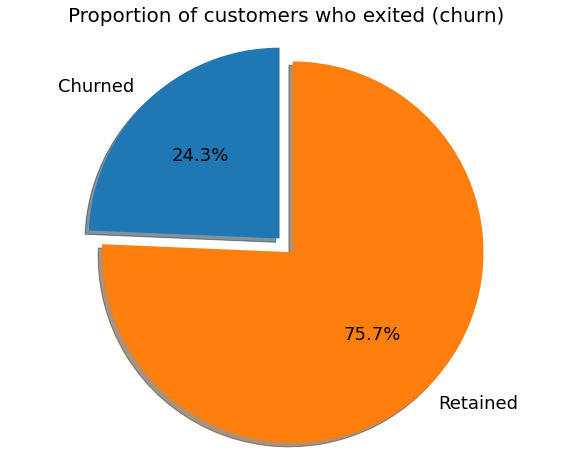

In [27]:
# 1. Create a pie chart
labels = 'Churned', 'Retained'
sizes = [df.Terminated[df['Terminated']==1].count(), df.Terminated[df['Terminated']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')
plt.title("Proportion of customers who exited (churn)", size = 20)
plt.show()

1. So, about 24% of the customers have churned. So the baseline model could be to predict that 24% of the customers will churn.  

2. Given that 24% is a small number, we want to ensure that our chosen model can predict with greater accuracy than 24%

- **Why?**

3. Note, the bank wants to identify and retain customers that would churn (all of them?). The bank may be willing to trade for some inaccuracy on predicting the customers that are not going to churn.

- **How would this impact your model?**


## 4.2 Let's see whether some categorical variables are related to churn...

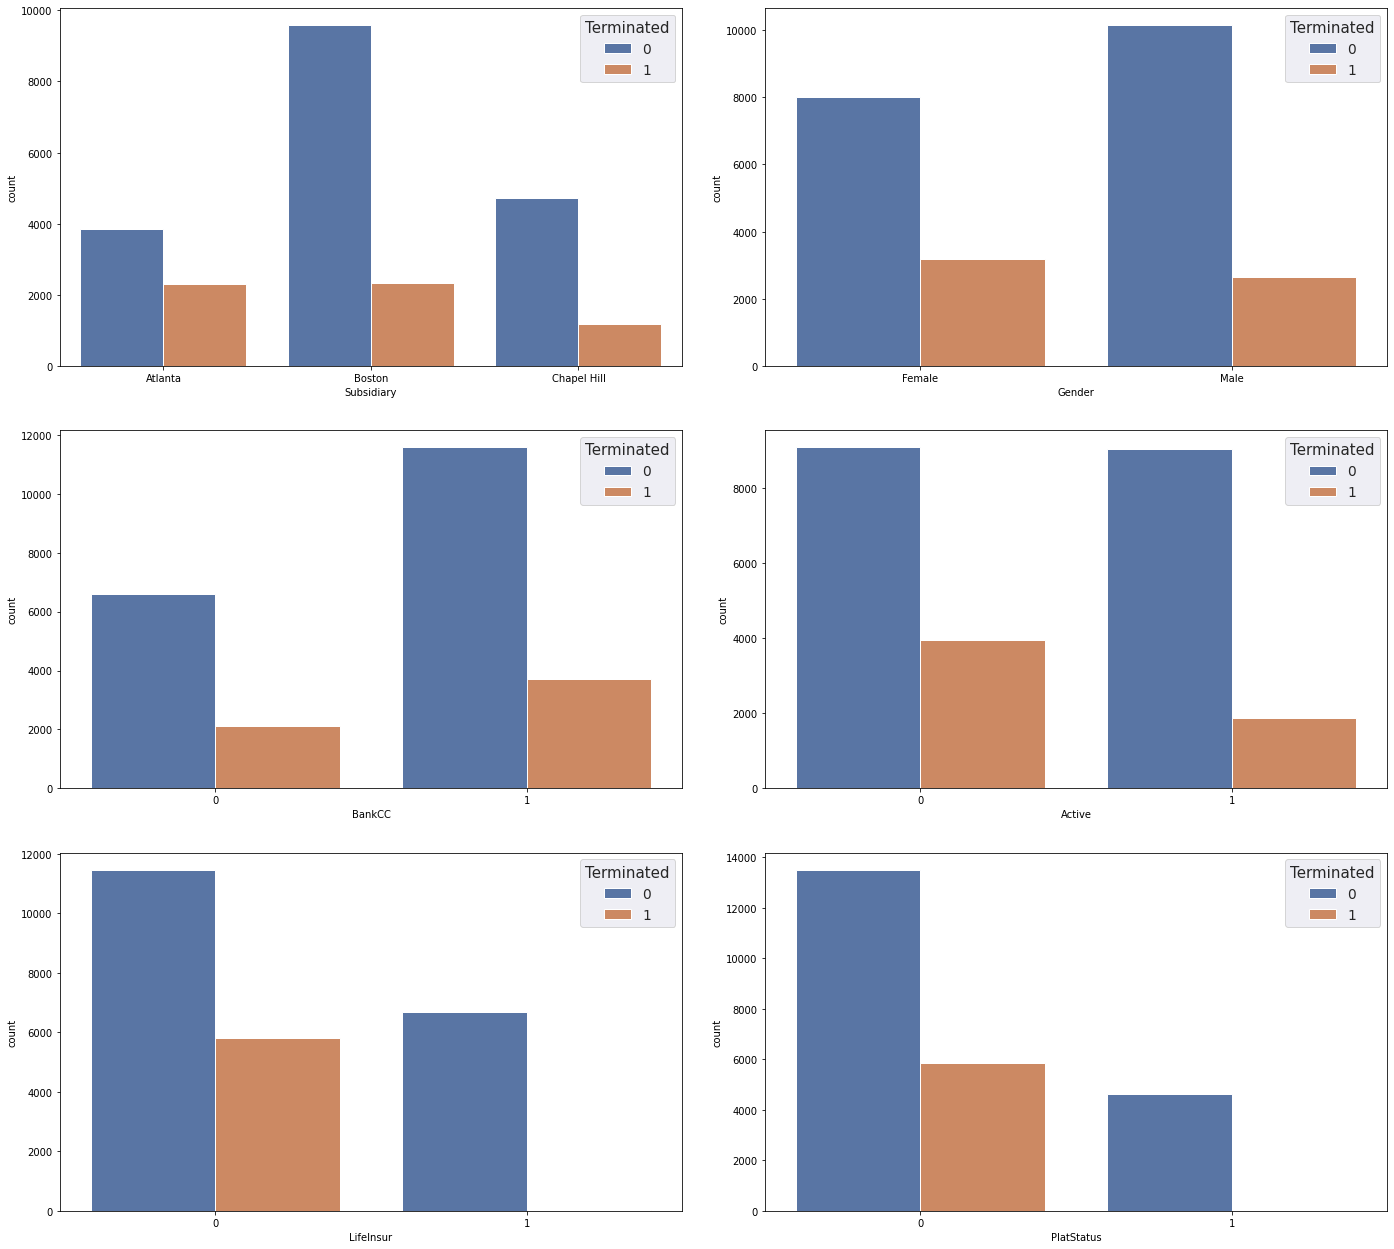

In [28]:
# 1. Create Barcharts for key variables that are split by our target variable(Terminated)
fig, axarr = plt.subplots(3, 2, figsize=(20, 18))
sns.set(font_scale = 1.25)
sns.countplot(x='Subsidiary', hue = 'Terminated',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Terminated',data = df, ax=axarr[0][1])
sns.countplot(x='BankCC', hue = 'Terminated',data = df, ax=axarr[1][0])
sns.countplot(x='Active', hue = 'Terminated',data = df, ax=axarr[1][1])
sns.countplot(x='LifeInsur', hue = 'Terminated',data = df, ax=axarr[2][0])
sns.countplot(x='PlatStatus', hue = 'Terminated',data = df, ax=axarr[2][1])
fig.tight_layout(pad=2.0)

**We note the following:**

- The majority of the data is from Boston customers. However, the proportion of churned customers is inversely related to the population of customers, suggesting that the bank may have a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
- The proportion of female customers churning is greater than that of male customers
- Interestingly, the majority of the customers that churned are those with the bank's credit card. This may be a coincidence, since the majority of the customers have the bank's credit card.
- Unsurprisingly, the inactive members churn more. It is a concern that the overall proportion of inactive mebers is high. Perhaps the bank can implement a program to turn this group into active customers? This would definitely decrease customer churn.
- Customers that have a life insurance plan with the bank tend to stick around. Perhaps this is an opportunity to create a customer retention measure?
- Most customers do not have platinum status; those who do, don't churn.

## 4.2 We can also explore probability distributions of termination by variables such as age 

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


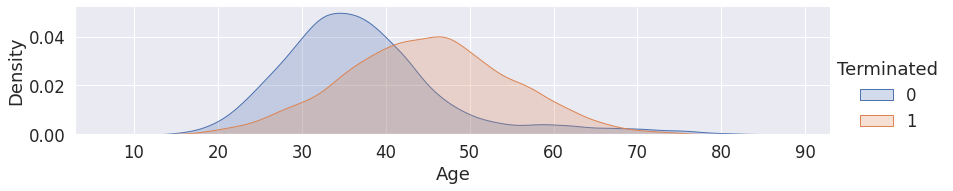

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


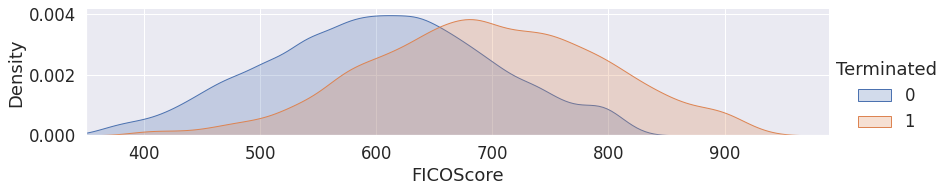

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


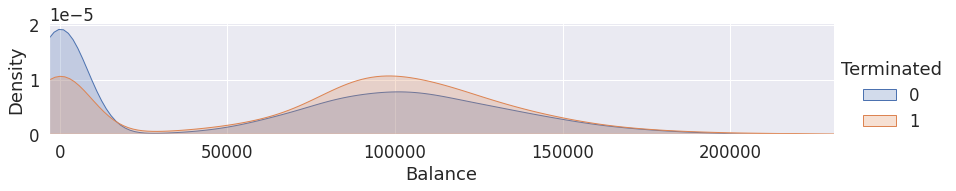

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


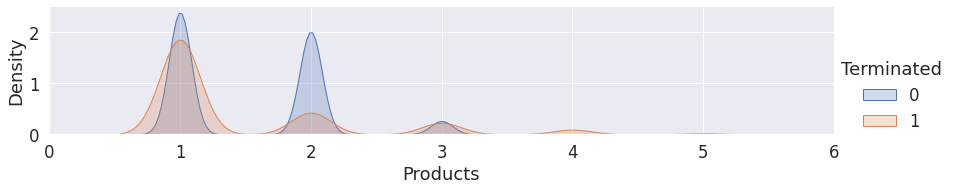

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


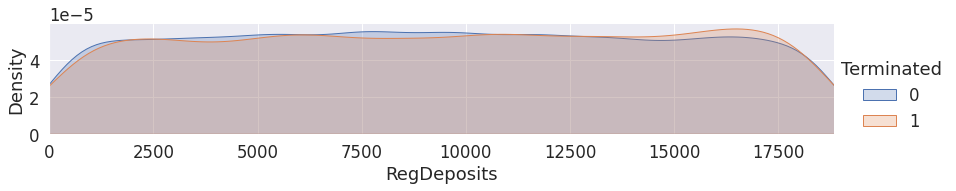

In [29]:
# 1. Visualize the distributions of numerical variables by status (i.e., our target variable)
sns.set(font_scale = 1.5)
for col in ['Age','FICOScore','Balance','Products','RegDeposits']:
  facet = sns.FacetGrid(df, hue="Terminated",aspect=4)
  facet.map(sns.kdeplot, col, shade= True)
  facet.set(xlim=(df[col].min(), df[col].max()))
  facet.add_legend()
  plt.show()

**Alternatively, we can use box-plots!**

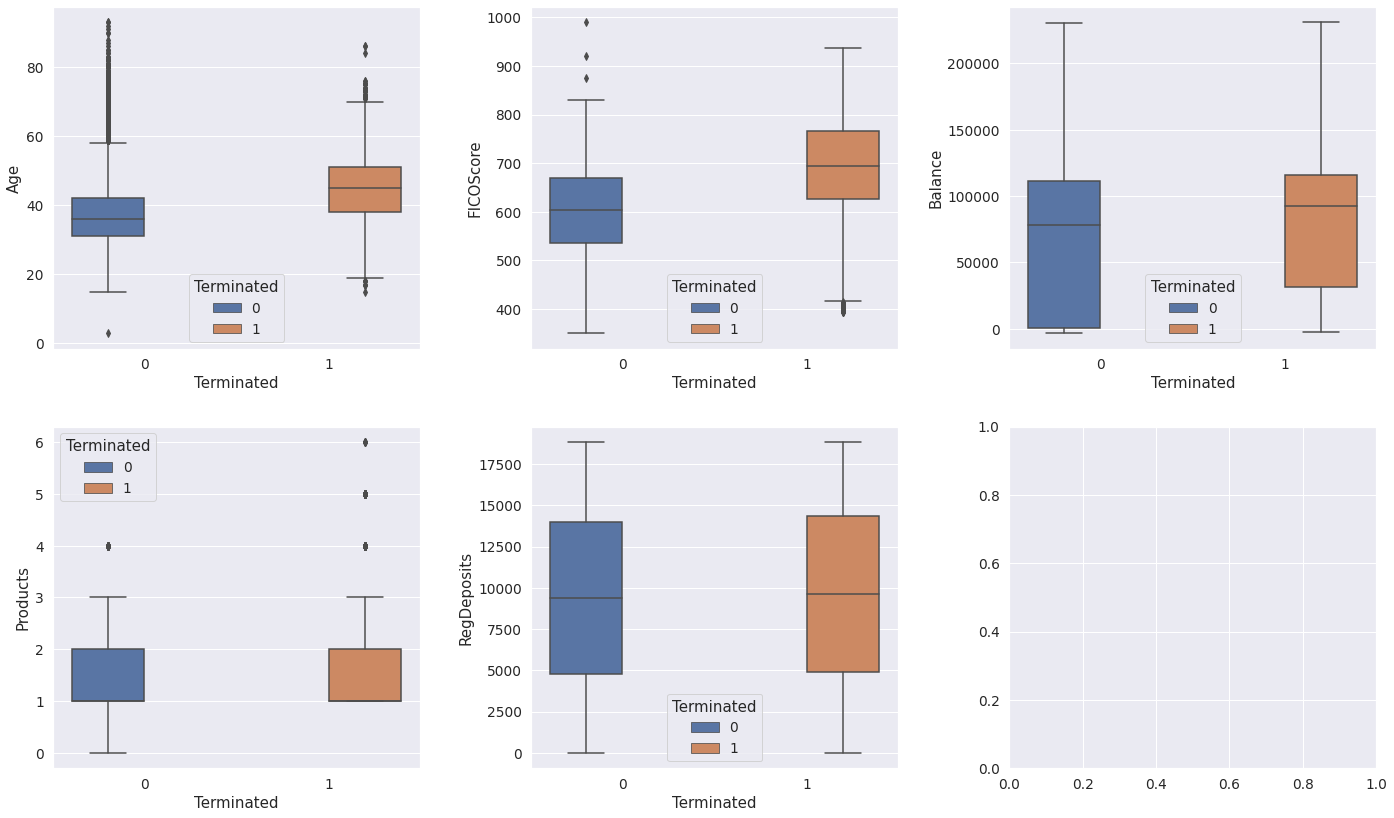

In [30]:
# 2. Boxplots for numerical variables
sns.set(font_scale = 1.25)
fig, axarr = plt.subplots(2,3, figsize=(20, 12))
sns.boxplot(y='Age',x = 'Terminated', hue = 'Terminated',data = df, ax=axarr[0][0])
sns.boxplot(y='FICOScore',x = 'Terminated', hue = 'Terminated',data = df , ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Terminated', hue = 'Terminated',data = df, ax=axarr[0][2])
sns.boxplot(y='Products',x = 'Terminated', hue = 'Terminated',data = df, ax=axarr[1][0])
sns.boxplot(y='RegDeposits',x = 'Terminated', hue = 'Terminated',data = df, ax=axarr[1][1])
fig.tight_layout(pad=2.0)

**We note the following:**

- The older customers are churning more than the younger ones, suggesting differences in service preference across the age categories. The bank may need to review their target market or review the strategies for retention for different age groups
- There is no significant difference in the credit score distribution between retained and churned customers.
- The bank is losing customers with higher bank balances which is likely to hit their available capital for lending.
- Neither the number of products nor the regular deposits has a significant effect on the likelihood to churn.

# 5. Feature Engineering

Can we use the data to create some new features that may be predicitive of customers leaving the bank?
In finance we often use ratios as meaningful KPIs (key performance indicators). Let's generate the Balance/Deposit ratio for the bank's customers!

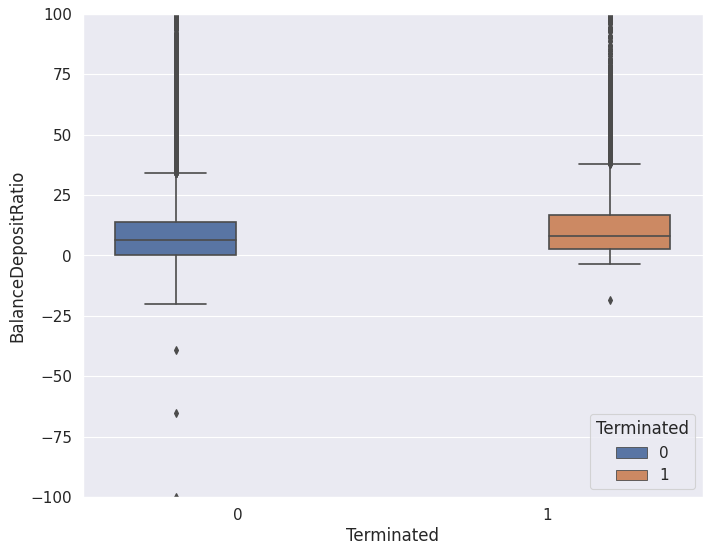

In [31]:
# 1. Add a new variable for Balance to Deposit Ratio to our dataframe ('BalanceDepositRatio')
df['BalanceDepositRatio'] = df.Balance/(df.RegDeposits+0.01)

# 2. Visually inspect its relation to our target variable
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(y='BalanceDepositRatio',x = 'Terminated', hue = 'Terminated',data = df)
plt.ylim(-100, 100)
sns.set(font_scale = 1.5)

In [32]:
print(f"Median Balance-Deposit-Ratio Overall: {df.BalanceDepositRatio.median()}")
print(f"Median Balance-Deposit-Ratio Retained: {df.BalanceDepositRatio[df['Terminated']==0].median()}")
print(f"Median Balance-Deposit-Ratio Churned: {df.BalanceDepositRatio[df['Terminated']==1].median()}")

Median Balance-Deposit-Ratio Overall: 6.974120590589962
Median Balance-Deposit-Ratio Retained: 6.473693509027903
Median Balance-Deposit-Ratio Churned: 8.230181352847422


- We saw that the salary has little effect on the chance of a customer churning. 
- However, the bank balance and the regular deposits indicate that customers with a higher balance deposit ratio churn more.
- Our finding could be worrying to the bank because this impacts their source of loan capital

In [33]:
# 3. Check that our data frame includes our new variable
df.head()
df.describe()

,FICOScore,Age,Balance,Products,RegDeposits,BalanceDepositRatio
count,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,2.399300e+04
mean,624.737298,39.210061,68494.616843,1.528821,9430.894803,9.549496e+02
std,105.271619,10.741156,56512.949160,0.677680,5413.669419,1.027370e+05
min,350.000000,3.000000,-3157.840000,0.000000,0.000000,-1.132451e+02
25%,552.000000,32.000000,450.820000,1.000000,4813.000000,5.192728e-02
50%,624.000000,38.000000,83113.680000,1.000000,9461.000000,6.974121e+00
75%,696.000000,45.000000,112422.400000,2.000000,14074.000000,1.431610e+01
max,990.000000,93.000000,230823.960000,6.000000,18833.000000,1.274477e+07


# 6. Data Preprocessing Pipeline
Let's put it all together in a pipeline that we can use to:
1. Test different models on the same data
2. Apply to future bank data (e.g., validation data set)

Let's re-load the data to start with a clean slate. 
  - This is also always the starting point for our analysis so that we can be sure that everything runs on the original data.

In [34]:
# 1. Create a function that does all pre-processing steps for us
""" Pre-processing Pipeline directly modifies dataframe df using .loc but then returns a new data frame with dummy variables.
# drop_dummy defaults to True to drop one of each one hot encoded variables and avoid multicollinearity."""

def PrePipe(df, drop_dummy=True):
    # 1a. Clean Categorical and Numeric data with our two Functions:
    clean_BankChurn_categories(df)
    clean_BankChurn_numeric(df)
    
    # 1b Feature Engineering
    df['BalanceDepositRatio'] = df.Balance/(df.RegDeposits+0.0001)
        
    # 1c Reorder the columns, dropping unused
    continuous_vars = ['FICOScore','Age','Balance','Products','RegDeposits', 'BalanceDepositRatio',]
    cat_cols = ['Gender','Subsidiary']
    zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus']

    # 1d Mix-max scale the data between 0 and 1
    df.loc[:,continuous_vars] = minmax_scale(df[continuous_vars])
  
    # 1e One-Hot Encode Categorical Variables
    return pd.get_dummies(df[['Terminated'] + continuous_vars + zero_one_cols + cat_cols], columns = cat_cols, drop_first=drop_dummy)

In [35]:
# 2. Load data and Pre-process
df = pd.read_json("Bank_Churn_Train.json")
df = PrePipe(df)
df.head()

,Terminated,FICOScore,Age,Balance,Products,RegDeposits,BalanceDepositRatio,BankCC,Active,LifeInsur,PlatStatus,Gender_Male,Subsidiary_Boston,Subsidiary_Chapel Hill
0,0,0.479688,0.277778,0.290531,0.333333,0.813997,9.222016e-08,0,0,0,0,1,1,0
1,0,0.223438,0.677778,0.398832,0.166667,0.297297,1.015375e-07,0,1,0,0,1,0,1
2,1,0.734375,0.477778,0.013496,0.166667,0.806297,8.890242e-08,0,0,0,0,0,0,1
3,0,0.500000,0.377778,0.014480,0.333333,0.000690,1.027904e-07,1,1,1,0,1,1,0
4,0,0.490625,0.333333,0.339668,0.333333,0.280253,1.002480e-07,1,1,1,1,0,0,0


# 7. Churn Prediction Model

We are now ready to predict customer churn. At the top, we imported from scikit-learn
- fit models
- support functions
- scoring functions


## 7.1 Classifier Performance
We want to systematically evaluate the performance of our classifier. Here we define functions that output our performance metrics.

In [36]:
# 1. Function to output best model score, parameters and estimator
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

# 2. Function to output accuracy score, visualize the confusion matrix, and print the classification report
def show_results(y_test, y_pred):
  # 2a. Output the accuracy of our prediction
  print(accuracy_score(y_test, y_pred))
  # 2b. Visualize the confusion matrix to make it easier to read
  con_matrix = confusion_matrix(y_test, y_pred)
  confusion_matrix_df = pd.DataFrame(con_matrix, ('Retained', 'Churned'), ('Retained', 'Churned'))
  heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
  plt.ylabel('Actual', fontsize = 14)
  plt.xlabel('Predicted', fontsize = 14)
  # 2c. Print the classification report
  print(classification_report(y_test, y_pred))

## 7.2 Let's use Logistic Regression to predict customer churn

### 7.2.1 Load and Pre-process Data

In [37]:
# 1. Start by loading and pre-processing our data
df = pd.read_json("Bank_Churn_Train.json")
df = PrePipe(df, drop_dummy=True)

# 2. Separate our target and input variables. 
y = df.Terminated
X = df.drop(columns=['Terminated'])

# 3. split sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 4. Check if data have right shape
print("Train: Response Variable: ",y_train.shape)
print("Train: Feature Variables: ",X_train.shape)
print("Test: Response Variable: ",y_test.shape)
print("Test: Feature Variables: ",X_test.shape)

Train: Response Variable:  (16795,)
Train: Feature Variables:  (16795, 13)
Test: Response Variable:  (7198,)
Test: Feature Variables:  (7198, 13)


### 7.2.2 Train a Logistic Regression Model

0.8626007224228952
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5447
           1       0.76      0.64      0.69      1751

    accuracy                           0.86      7198
   macro avg       0.82      0.79      0.80      7198
weighted avg       0.86      0.86      0.86      7198



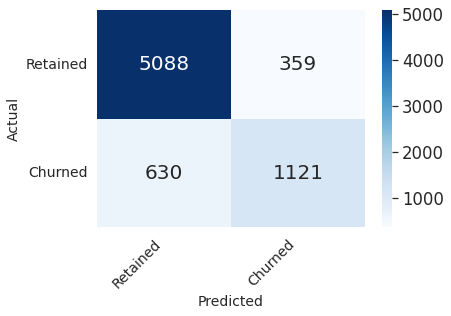

In [38]:
# 1. Instantiate the classifier: logreg
logreg = LogisticRegression(solver='lbfgs', C=1, tol=.0001, max_iter=1000)

# 2. Fit the classifier to the training data
logreg.fit(X_train, y_train)

# 3. Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# 4. Call function to evaluate model performance and show results
show_results(y_test, y_pred)

In [39]:
# 5. We can examine the intercept as follows:
print (f'Logistic Regression Intercept: {logreg.intercept_[0]}')

# 6. We can examine the coefficients as follows:
print (f'\nLogistic Regression Coefficients: {logreg.coef_[0]}')

Logistic Regression Intercept: -6.478471361499379

Logistic Regression Coefficients: [ 5.92539842  6.95424304 -0.44958093  6.56326369  0.40627681  0.60322995
  0.19588512 -1.02868046 -5.02318008 -4.87434357 -0.40342359 -0.95440071
 -0.92026293]


## **Which "Square" of the Confusion Matrix do we care for most?**

**Do you remember what we learned in Class 05 ?**

------------
<p style="text-align: left; font-size:120%; font-weight: normal; font-style: normal;">
$\text{Accuracy} = \frac{t_p + t_n}{t_p + t_n + f_p + f_n}$ <br><br> 
$\text{Precision} = \frac{t_p}{t_p + f_p}$    <br><br>    
$\text{Recall} = \frac{t_p}{t_p + f_n}$   <br><br>    
$F_1 \text{ score} = 2 \times \frac{\textit{precision}\, \times \,\textit{recall}}{\textit{precision}\, + \,\textit{recall}}$ 
</p>

------------


####**Precision** measures the ability of the classifier not to mislabel a negative sample as positive
####**Recall** measures the ability of the classifier to find all the positive samples.

### 7.2.3 Can we improve our results?

Let's tune our hyperparameters using a Grid-Search with Cross-Fold validation

In [40]:
# 1. Define parameter space to test
param_grid = {'C': [.1,1,10], 'tol':[.001, .0001, .00001]}

# 2. Instantiate model: Note that we can define which score (i.e., performance metric such as precision or recall) we want to tune the hyperparameters towards. WHY would we do so?
log_Grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000),param_grid, cv=5, refit=True, verbose=0, scoring = 'recall')

# 3. Fit model to data
log_Grid.fit(X_train, y_train);

# 4. Show model accuracy and best parameters (i.e., tuned)
print(best_model(log_Grid))

0.6492905944283008
{'C': 10, 'tol': 0.001}
LogisticRegression(C=10, max_iter=1000, tol=0.001)
None


0.8620450125034732
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5447
           1       0.75      0.65      0.70      1751

    accuracy                           0.86      7198
   macro avg       0.82      0.79      0.80      7198
weighted avg       0.86      0.86      0.86      7198



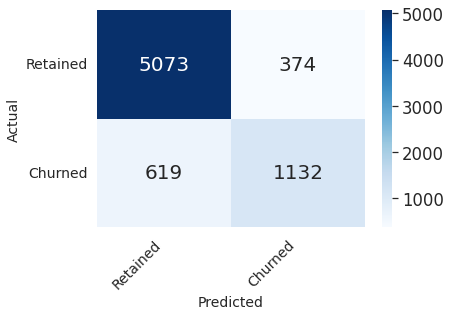

In [41]:
# 5. Model is already trained with the optimal parameters identified and set
y_pred = log_Grid.predict(X_test)

# 6. Call function to evaluate model performance and show results
show_results(y_test, y_pred)

# The code below produces the same results because we set refit=True in our grid search above

#LR=LogisticRegression(C=10, solver='lbfgs', tol=0.001)
#LR.fit(X_train, y_train);
#y_pred = LR.predict(X_test)
#show_results(y_test, y_pred)


## 7.3 Can a Random Forest Model do better?

### 7.3.1 Load and Pre-process Data

In [42]:
# 1. Start by loading and pre-processing our data
df = pd.read_json("Bank_Churn_Train.json")
df = PrePipe(df, drop_dummy=True)

# 2. Separate our target and input variables. 
y = df.Terminated
X = df.drop(columns=['Terminated'])

# 3. split sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 4. Check if data have right shape
print("Train: Response Variable: ",y_train.shape)
print("Train: Feature Variables: ",X_train.shape)
print("Test: Response Variable: ",y_test.shape)
print("Test: Feature Variables: ",X_test.shape)

Train: Response Variable:  (16795,)
Train: Feature Variables:  (16795, 13)
Test: Response Variable:  (7198,)
Test: Feature Variables:  (7198, 13)


### 7.3.2 Train a Random Forest Model

0.8791330925257016
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5447
           1       0.81      0.65      0.72      1751

    accuracy                           0.88      7198
   macro avg       0.85      0.80      0.82      7198
weighted avg       0.88      0.88      0.87      7198



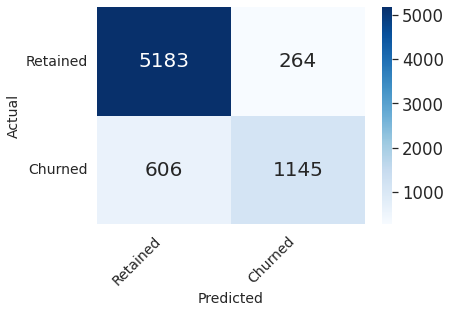

In [43]:
# 1. Instantiate a Random Forest Classifier (RandomForestClassifier was previously imported from sklearn)
forest = RandomForestClassifier(max_features=6, n_estimators=25, max_depth=9,random_state=21)

# 2. Train the model using the training sets
forest.fit(X_train, y_train)  

# 3. Predict the response for test dataset
y_pred = forest.predict(X_test)

# 4. Call function to evaluate and show model performance
show_results(y_test, y_pred)

### 7.3.3 Let's tune our hyperparameters using a Grid-Search with Cross-Fold validation

In [44]:
# 1. Define grid (i.e., hyperparameter combinations to test for)
param_grid = {'n_estimators': [10, 25, 50], 'max_depth' : [6, 9, 12], 'max_features' : [3, 6, 9]}

# 2. Instantiate the model (do not include parameters from the parameter grid in the classifier that you use; here, RandomForestClassifier())
forest_Grid = GridSearchCV(RandomForestClassifier(random_state=21), param_grid, cv=5, refit=True, verbose=0, scoring = 'recall')

# 3. Fit the model (i.e., train it on training data)
forest_Grid.fit(X_train, y_train);

# 4. Output optimal Hyperparameter combination
print(best_model(forest_Grid))

0.6899159965644481
{'max_depth': 12, 'max_features': 9, 'n_estimators': 50}
RandomForestClassifier(max_depth=12, max_features=9, n_estimators=50,
                       random_state=21)
None


0.8880244512364546
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5447
           1       0.82      0.69      0.75      1751

    accuracy                           0.89      7198
   macro avg       0.86      0.82      0.84      7198
weighted avg       0.88      0.89      0.88      7198



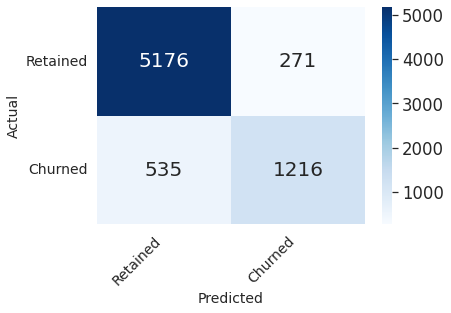

In [45]:
# 5. Model is already trained with the optimal parameters identified and set: Use it to make prediction
y_pred = forest_Grid.predict(X_test)

# 6. Call function to evaluate model performance and show results
show_results(y_test, y_pred)

### 7.3.4 Let's take a look at which features are most important for our prediction

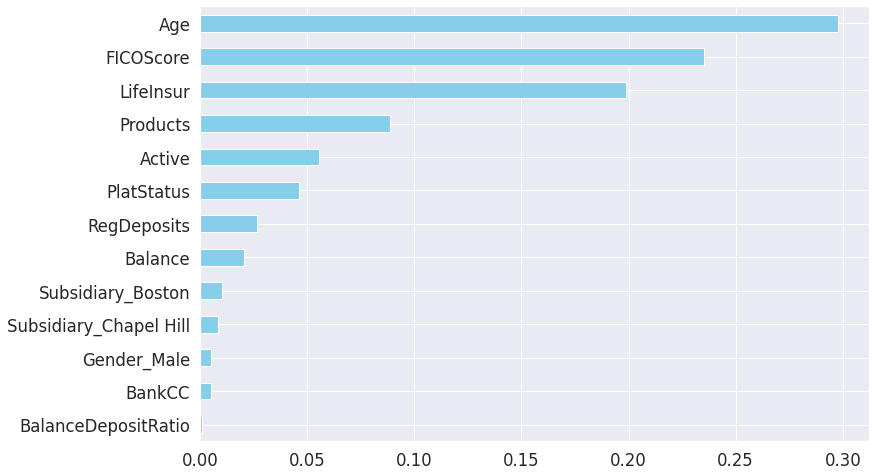

In [46]:
# 1. Extract features and their importances
feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns)

# 2. Sort importances_rf
sorted_importances_rf = feat_importances.sort_values()

# 3. Make a horizontal bar plot
plt.figure(figsize=(12,8))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# 8. Making things better: Did we overlook something?

In [47]:
# 1. Start by loading our data
df = pd.read_json("Bank_Churn_Train.json")

In [48]:
# 2. Let's take a close look at the variables again
df.head(10)

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
0,61BOS20150MF65876258487565N,Myles,Fidel,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0
1,91CHL20170DA95890902611393N,Drenner,Arron,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0
2,91CHL20180MC38607441559869N,Muir,Charolette,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1
3,61BOS20110SH53586596382094N,Schimpf,Herschel,670,Boston,Male,37,230.10,2,1,1,13,1,0,0
4,40ATL20110MK15149165663931P,Montez,Kisha,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0
5,61BOS20110VN70126282954472N,Vannostrand,Nestor,609,Boston,Male,60,1022.58,1,0,1,15881,0,0,0
6,61BOS20080KC6347786770392N,Kuhl,Cecil,643,Boston,Male,31,106218.68,2,0,1,6364,1,0,0
7,91CHL20190HM38218050506782N,Harnois,Molly,665,Chapel Hill,Female,46,95920.80,1,1,0,1764,0,0,1
8,61BOS20140MG75755145920761N,Mccurtain,Guy,431,Boston,Male,32,92598.48,3,0,0,10669,1,0,0
9,91CHL20110AS78762075854923P,Auringer,Shayla,529,Chapel Hill,Female,38,354.12,2,1,1,10239,1,1,0


**Which variables did we previously drop?**
- ClientID
- Surname
- Firstname

## 8.1 Extract Information from a Variable

In [49]:
# 1. Extract CityCode from ClientID
df['CityCode'] = df.ClientID.str[:5]

# 2. Extract Year from ClientID
df['Year'] = df.ClientID.str[5:9].astype('int')

# 3. Keep only those after 2005 
df = df[df.Year > 2005]

# 4. Take a look
df.head()

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated,CityCode,Year
0,61BOS20150MF65876258487565N,Myles,Fidel,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0,61BOS,2015
1,91CHL20170DA95890902611393N,Drenner,Arron,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0,91CHL,2017
2,91CHL20180MC38607441559869N,Muir,Charolette,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1,91CHL,2018
3,61BOS20110SH53586596382094N,Schimpf,Herschel,670,Boston,Male,37,230.10,2,1,1,13,1,0,0,61BOS,2011
4,40ATL20110MK15149165663931P,Montez,Kisha,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0,40ATL,2011


In [50]:
# 5. It looks as if CityCode replicates Subsidiary
df[['Subsidiary','CityCode']].value_counts()

Subsidiary   CityCode
Boston       61BOS       11912
Atlanta      40ATL        6161
Chapel Hill  91CHL        5926
dtype: int64

**We won't need all of these - let's drop the ones that we think will not help our model**

In [51]:
# 6. Drop replicate columns and those that carry no meaning for our model
df = df.drop(["CityCode"], axis = 1) # we used it just for exploration
df = df.drop(["ClientID", "Surname", "Firstname"], axis = 1) 

# ... And check which ones are left
df.head()

,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated,Year
0,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0,2015
1,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0,2017
2,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1,2018
3,670,Boston,Male,37,230.10,2,1,1,13,1,0,0,2011
4,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0,2011


## 8.2 Feature Engineering from "Year"





In [52]:
# 1. Rather than looking at Year, let's look at the number of years the customer has been with the bank.
df['Tenure'] = 2022 - df.Year
df.head()

,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated,Year,Tenure
0,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0,2015,7
1,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0,2017,5
2,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1,2018,4
3,670,Boston,Male,37,230.10,2,1,1,13,1,0,0,2011,11
4,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0,2011,11


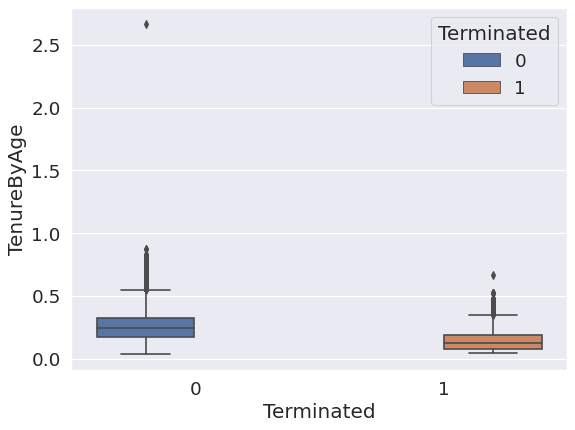

In [53]:
# 2. We may suspect that older people may have longer Tenure, so let's look at that ratio. 
df['TenureByAge'] = df.Tenure/(df.Age)

# 2a. Let's look at the distributions
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(y='TenureByAge',x = 'Terminated', hue = 'Terminated',data = df)
sns.set(font_scale = 1.5)

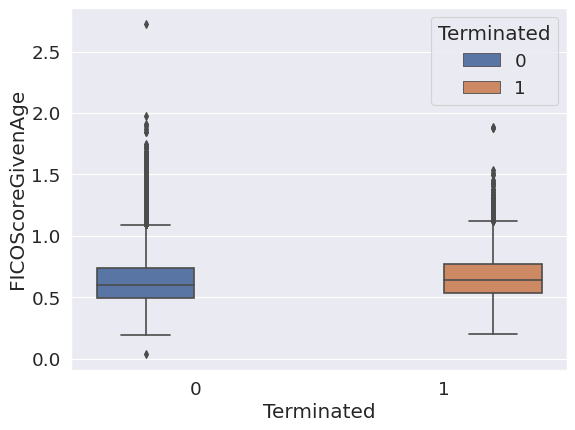

In [54]:
# 3. Lastly we introduce a variable to capture credit score given age to take into account credit behavior visavis adult life
df['FICOScoreGivenAge'] = df.Age/df.FICOScore*10

# 3a. Let's look at the distributions
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(y='FICOScoreGivenAge',x = 'Terminated', hue = 'Terminated',data = df)
sns.set(font_scale = 1.5)

## 8.3 Update Pre-Processing Pipeline
- Get Year from ClientID
- Feature Engineer Tenure variables

In [55]:
# 4. Update Pre-Processing Pipeline

''' Updated function that does all of the pre-processing for us
It directly modifies dataframe df using .loc but then returns a new data frame with dummy variables.
optionally drop_dummy defaults to True to drop one of each one hot encoded variables and avoid multicollinearity.'''
def PrePipe(df, drop_dummy=True):  
    # 4a. Clean variables
    clean_BankChurn_categories(df)
    clean_BankChurn_numeric(df)
    
    # 4b. Engineer Features
    df['BalanceDepositRatio'] = df.Balance/(df.RegDeposits+0.0001)

    # 4c. Engineer NEW Tenure Features
    df['Year'] = df.ClientID.str[5:9].astype('int')
    df['Tenure'] = 2022 - df.Year
    df['TenureByAge'] = df.Tenure/(df.Age)
    df['FICOScoreGivenAge'] = (df.Age)/df.FICOScore*10
     
    # 4d. Reorder the columns, dropping unused. NEW: now includes our new tenure-based features
    continuous_vars = ['FICOScore','Age','Balance','Products','RegDeposits', 'Tenure','BalanceDepositRatio','TenureByAge','FICOScoreGivenAge']
    cat_cols = ['Gender','Subsidiary']
    zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus']

    # 4. Decision Trees do not require variables to be on the same scale; let's skip this step by commenting it out
    # df.loc[:,continuous_vars] = minmax_scale(df[continuous_vars])
  
    # One-Hot Encode Categorical Variables
    return pd.get_dummies(df[['Terminated'] + continuous_vars + zero_one_cols + cat_cols], columns = cat_cols, drop_first=drop_dummy)

## 8.4 Train Model again and Evaluate
- Does Tenure matter?

### 8.4.1 Load and Clean Data

In [56]:
# 1. Start by loading and pre-processing our data
df = pd.read_json("Bank_Churn_Train.json")
df = PrePipe(df, drop_dummy=True)

# 2. Separate our target and input variables. 
y = df.Terminated
X = df.drop(columns=['Terminated'])

# 3. split sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 4. Check if data have right shape
print("Train: Response Variable: ",y_train.shape)
print("Train: Feature Variables: ",X_train.shape)
print("Test: Response Variable: ",y_test.shape)
print("Test: Feature Variables: ",X_test.shape)

Train: Response Variable:  (16795,)
Train: Feature Variables:  (16795, 16)
Test: Response Variable:  (7198,)
Test: Feature Variables:  (7198, 16)


### 8.4.1 Random Forest Classifier
- Hyperparameter tuning
- Cross-Fold Validation
- Model Performance

In [57]:
# 1. Define grid (i.e., hyperparameter combinations to test for)
param_grid = {'n_estimators': [25, 50], 'max_depth' : [10, 20], 'max_features' : [5, 7]}

# 2. Instantiate the model (do not include parameters from the parameter grid in the classifier that you use; here, RandomForestClassifier())
NewForest_Grid = GridSearchCV(RandomForestClassifier(random_state=21), param_grid, cv=5, refit=True, n_jobs=-1, verbose=0, scoring = 'recall')

# 3. Fit the model (i.e., train it on training data)
NewForest_Grid.fit(X_train, y_train);

# 4. Output optimal Hyperparameter combination
print(best_model(NewForest_Grid))

0.7775372359368313
{'max_depth': 20, 'max_features': 7, 'n_estimators': 50}
RandomForestClassifier(max_depth=20, max_features=7, n_estimators=50,
                       random_state=21)
None


***Use parameters to train and fit model***

0.9153931647679912
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5447
           1       0.87      0.77      0.82      1751

    accuracy                           0.92      7198
   macro avg       0.90      0.87      0.88      7198
weighted avg       0.91      0.92      0.91      7198



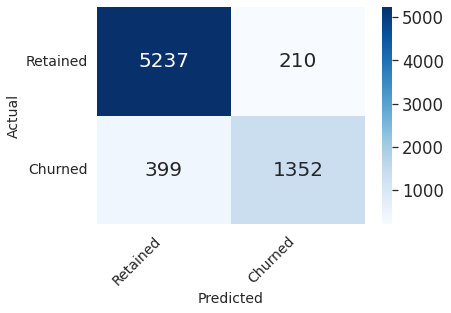

In [58]:
# 5. Instantiate a Random Forest Classifier (RandomForestClassifier was previously imported from sklearn)
NewForest = RandomForestClassifier(max_features=7, n_estimators=50, max_depth=20, random_state=21)

# 6. Train the model using the training sets
NewForest.fit(X_train, y_train)  

# 7. Predict the response for test dataset
y_pred = NewForest.predict(X_test)

# 8. Call function to evaluate and show model performance
show_results(y_test, y_pred)

***What about Feature Importance? Did anything change?***

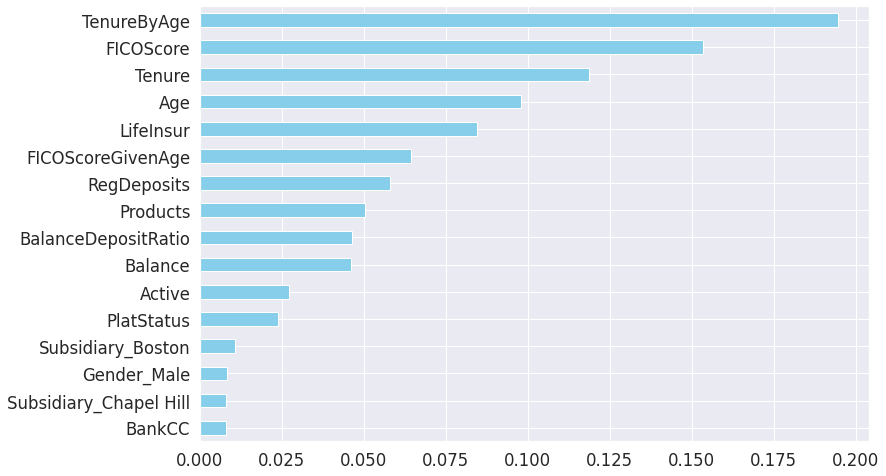

In [59]:
# 9. Extract features and their importances
feat_importances = pd.Series(NewForest.feature_importances_, index=X_train.columns)

# 10. Sort importances_rf
sorted_importances_rf = feat_importances.sort_values()

# 11. Make a horizontal bar plot
plt.figure(figsize=(12,8))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# 9. Finalize our Model
- We find that
  - Random Forest beats Logistic Regression in our empirical setting. 
  - Hyperparameter tuning improves performance slightly
  - Feature Engineering "Tenure" dramatically improves model performance
- Let's train a ***Final Random Forest Model*** on all variables:
    - Use entire training data
    - Use Cross-Fold validation
    - Hyperparameter tuning: Randomized Search CV for faster tuning

In [60]:
# 1. Start by loading and pre-processing our data
df = pd.read_json("Bank_Churn_Train.json")
df = PrePipe(df, drop_dummy=True)

# 2. Separate our target and input variables. 
y = df.Terminated
X = df.drop(columns=['Terminated'])

**An exhaustive search of the parameter grid can take a long time.** Particularly:
- when there are many parameters to tune
- when these parameters can assume many different values
- on a slow computer (or limited virtual environment, like free CoLab)

In [61]:
# 3. Define grid (i.e., hyperparameter combinations to test for)
#param_grid = {'n_estimators': [25, 50], 'max_depth' : [10, 20], 'max_features' : [5, 7]}

# 4. Instantiate the model (do not include parameters from the parameter grid in the classifier that you use; here, RandomForestClassifier())
#FinalForest_Grid = GridSearchCV(RandomForestClassifier(random_state=21), param_grid, cv=5, refit=True, n_jobs=-1, verbose=0, scoring = 'recall')

# 5. Fit the model (i.e., train it on training data)
#FinalForest_Grid.fit(X, y);

# 6. Output optimal Hyperparameter combination
#print(best_model(FinalForest_Grid))

# 7. Instantiate a Random Forest Classifier (RandomForestClassifier was previously imported from sklearn)
#FinalForest = RandomForestClassifier(max_features=6, n_estimators=100, max_depth=12,random_state=21)

# 8. Train the model using the training sets
#FinalForest.fit(X, y) 

***To speed things up***: Use RandomizedSearchCV. 

In contrast to `GridSearchCV`, not all parameter values are tried, but rather a fixed number of parameter settings is sampled from specified distributions. The number of parameter settings that are tried is given by `n_iter`.

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# 1 .define search
param_grid = {'n_estimators': [25, 50, 100], 'max_depth' : [10, 15, 20], 'max_features' : [3, 5, 7]}
search = RandomizedSearchCV(RandomForestClassifier(random_state=21), param_grid, n_iter=15, scoring='recall', n_jobs=-1, cv=5, random_state=21)

# 5. Fit the model (i.e., train it on training data)
search.fit(X, y);

# 6. Output optimal Hyperparameter combination
print(best_model(search))

0.7906430843633718
{'n_estimators': 50, 'max_features': 7, 'max_depth': 20}
RandomForestClassifier(max_depth=20, max_features=7, n_estimators=50,
                       random_state=21)
None


In [63]:
# 7. Instantiate a Random Forest Classifier (RandomForestClassifier was previously imported from sklearn): Set the parameters that we found with RandomizedSearchCV
FinalForest = RandomForestClassifier(max_depth=20, max_features=7, n_estimators=50, random_state=21)

# 8. Train the model using the training sets
FinalForest.fit(X, y)  

RandomForestClassifier(max_depth=20, max_features=7, n_estimators=50,
                       random_state=21)

0.9977771603223118
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5447
           1       1.00      0.99      1.00      1751

    accuracy                           1.00      7198
   macro avg       1.00      1.00      1.00      7198
weighted avg       1.00      1.00      1.00      7198



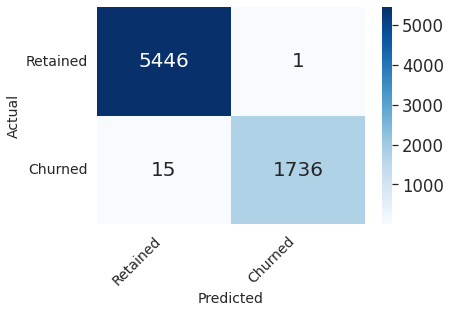

In [64]:
# 9. Predict with our final model
y_pred = FinalForest.predict(X_test)

# 10. Call function to evaluate and show model performance
show_results(y_test, y_pred)

In [65]:
# 11. Save our Model in a file
filename = 'finalized_model.sav'
pickle.dump(FinalForest, open(filename, 'wb'))

# 10. Use our Model to Decide on Who to Fight for and Who to Let Go
- Use our model to predict churn
- Determine who to let go and who to keep
  - Need a metric for customer value!

In [66]:
# 1. Load our trained Model from file
filename = 'finalized_model.sav'
FinalForest = pickle.load(open(filename, 'rb'))

In [67]:
# 1. Load New Customer Data and take a first look
NewCustomers = pd.read_json("Bank_Churn_NewCustomers.json")
NewCustomers.head()

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev
0,40ATL20090WS41659688130478N,Wadhams,Sanford,694,Atlanta,Male,44,108144.68,1,1,0,17817,0,0,2697
1,40ATL20170FP60312547517267P,Fettig,Pennie,598,Atlanta,Female,34,96288.36,2,1,1,13426,1,1,2228
2,91CHL20170GT18583156644435N,Gaede,Todd,795,Chapel Hill,Male,50,93941.60,1,1,0,14721,0,0,2320
3,61BOS20190KR46667217568988N,Kruppa,Roberto,545,Boston,Male,28,115471.93,1,1,0,9879,0,0,2606
4,40ATL20170GE64239156077829P,Girad,Eddie,575,Atlanta,Male,41,109667.80,2,1,0,13189,1,1,2389


In [68]:
NewCustomers.shape

(1000, 15)

**How are these data different to our training data?**

## 10.1 Prepare New Customer Data for Prediction
  - Cannot drop customers - Why?
  - No response variable - Why?

### 10.1.1 Update Preprocessing
- Need to update preprocessing

In [69]:
# 1. Update Function that handles the Cleaning of Categorical Variables: There is no variable "Terminated" in New Customer Data
''' 
This function is to clean categories in the New Customer Bank Churn Data.
Directly modifies the data frame df using .loc 
'''
def clean_BankChurn_categories(df):
  
  # 1a. Identify the two types of categorical data 
  cat_cols = ['Gender','Subsidiary']
  zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus']

  # 1b. Clean-up Gender
  df.loc[df.Gender.str.startswith('F'), 'Gender'] = 'Female'
  df.loc[df.Gender.str.startswith('M'), 'Gender'] = 'Male'
  
  # 1c. Fix PlatStatus
  if (df.PlatStatus.dtype == 'object') and (df.PlatStatus == 'yes').any():  # recode "yes" to 1, if present
    df.loc[df.PlatStatus == 'yes', 'PlatStatus'] = '1'
  if (df.PlatStatus.dtype == 'object') and (df.PlatStatus == 'no').any():   # recode "no" to 0, if present
    df.loc[df.PlatStatus == 'yes', 'PlatStatus'] = '0'
  df.loc[:,'PlatStatus'] = df['PlatStatus'].astype(int)

  # 1d. Enforce boundaries for zero/one columns:
  for col in zero_one_cols:
    df.loc[:,col].clip(0,1, inplace = True) # "clip" assigns values outside boundary to boundary values.

  # 1e. Typecast all categorical and zero/one columns to categorical
  for col in cat_cols+zero_one_cols:
    df.loc[:,col] = df[col].astype('category')

In [70]:
# 2. Update Function that Cleans the Numerical Variables: Cannot drop customers! Need to predict them all.
''' 
This function is to clean numeric fields of the New Customer Bank Churn data.
Directly modifies the data frame df using .loc and drop inplace.
'''
def clean_BankChurn_numeric(df):
  
  # 2a. Impute invalid data with medians
  df.loc[df.Age > 100,'Age'] = df.Age.median()
  df.loc[df.Products > 10, 'Products'] = df.Products.median()
  
  # 2b. Set values outside of valid ranges to valid values (at limits)
  df.loc[df.FICOScore<=299, 'FICOScore'] = 300
  df.loc[df.Balance < -5000, 'Balance'] = -5000
  df.loc[df.Balance > 5e5, 'Balance'] = 5e5
  df.loc[df.RegDeposits < 0, 'RegDeposits'] = 0
  df.loc[df.RegDeposits > 1e5, 'RegDeposits'] = 1e5 

In [71]:
# 3. Update Preprocessing Function
# It directly modifies dataframe df using .loc but then returns a new data frame with dummy variables.
# optinonally drop_dummy defaults to True to drop one of each one hot encoded variables and avoid multicollinearity.
def PrePipe(df, drop_dummy=True):
    clean_BankChurn_categories(df)
    clean_BankChurn_numeric(df)
    
    # Engineer Features
    df['BalanceDepositRatio'] = df.Balance/(df.RegDeposits+0.0001)

    # Engineer NEW Tenure Features
    df['Year'] = df.ClientID.str[5:9].astype('int')
    df['Tenure'] = 2022 - df.Year
    df['TenureByAge'] = df.Tenure/(df.Age)
    df['FICOScoreGivenAge'] = (df.Age)/df.FICOScore*10
     
    # Reorder the columns, dropping unused. NEW: now includes our new tenure-based features
    continuous_vars = ['FICOScore','Age','Balance','Products','RegDeposits', 'Tenure','BalanceDepositRatio','TenureByAge','FICOScoreGivenAge']
    cat_cols = ['Gender','Subsidiary']
    zero_one_cols = ['BankCC','Active','LifeInsur', 'PlatStatus']

    # mix-max scale the data between 0 and 1: won't use because we don't need to with a tree model
    #df.loc[:,continuous_vars] = minmax_scale(df[continuous_vars])
  
    # One-Hot Encode Categorical Variables
    return pd.get_dummies(df[continuous_vars + zero_one_cols + cat_cols], columns = cat_cols, drop_first=drop_dummy)

### 10.1.2 Remove Variables that Model was not Trained on
-  Our model has not seen Bank Revenue in its training. Must remove it!

In [72]:
# 1. Create new Dataframe that includes Variables that our Model was trained on. VERY IMPORTANT! Why?
# 1a Drop Bank Revenue
df = NewCustomers.drop(columns=['BnkRev'])

## 10.1.3 Preprocess Data with New Pipeline


In [73]:
# 2. Preprocess data with our Preprocessing Pipeline
X = PrePipe(df, drop_dummy=True)

## 10.2 Use our Trained Model to predict which Customers will Churn

In [74]:
# 1. Predict with Base Random Forest Model
y_pred = FinalForest.predict(X)

# 2. Add prediction to New Customer Data
NewCustomers['AtRisk']=y_pred

# 3. Check if it worked
NewCustomers.head()

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev,AtRisk
0,40ATL20090WS41659688130478N,Wadhams,Sanford,694,Atlanta,Male,44,108144.68,1,1,0,17817,0,0,2697,0
1,40ATL20170FP60312547517267P,Fettig,Pennie,598,Atlanta,Female,34,96288.36,2,1,1,13426,1,1,2228,0
2,91CHL20170GT18583156644435N,Gaede,Todd,795,Chapel Hill,Male,50,93941.60,1,1,0,14721,0,0,2320,1
3,61BOS20190KR46667217568988N,Kruppa,Roberto,545,Boston,Male,28,115471.93,1,1,0,9879,0,0,2606,0
4,40ATL20170GE64239156077829P,Girad,Eddie,575,Atlanta,Male,41,109667.80,2,1,0,13189,1,1,2389,0


## 10.3 Quantify Financial Risk to Bank
- How much Revenue is at Stake?
  - Depends of Customer Revenue
  - Depends on Probability that customer churns
- Informs how much to spend on customer retention measures!

### 10.3.1 Use Model to estimate Churn Probabilities

In [75]:
# 1. Predict churn probabilities and add directly to New Customer Data
NewCustomers['ChurnProb']=FinalForest.predict_proba(X)[:, 1]

# 2. Check if it worked
NewCustomers.sort_values(by=['ChurnProb'], ascending=False, inplace=True)
NewCustomers.head(10)

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev,AtRisk,ChurnProb
500,61BOS20190KG56617796163233N,Klapec,Guy,755,Boston,Male,44,105551.2,1,1,0,10436,0,0,2424,1,1.0
196,40ATL20190VR63232861434722N,Vollmers,Retta,755,Atlanta,Female,52,87391.2,1,1,0,15876,0,0,2224,1,1.0
237,40ATL20190HC24944424045814N,Hersey,Caprice,724,Atlanta,Female,55,101969.6,4,1,1,7576,0,0,2366,1,1.0
234,61BOS20180ST74721338312226N,Segundo,Tad,821,Boston,Male,51,84076.8,1,1,1,1530,0,0,1826,1,1.0
651,40ATL20190AF4790548168195N,Alveraz,Fredric,909,Atlanta,Male,60,103680.0,1,1,1,2888,0,0,2259,1,1.0
657,61BOS20190HK39631902539123N,Hedegaard,Kristian,851,Boston,Female,46,46343.2,1,1,0,8051,0,0,1168,1,1.0
675,91CHL20190NB10041533041510N,Nawn,Bradford,751,Chapel Hill,Male,55,1348.0,3,1,0,17647,0,0,556,1,1.0
682,61BOS20190MW91801201599956N,Mcaveney,Wei,722,Boston,Female,45,0.0,3,1,0,8371,0,0,251,1,1.0
369,91CHL20190BE90216450569056N,Bellantuono,Else,895,Chapel Hill,Female,51,0.0,1,1,0,2982,0,0,89,1,1.0
177,61BOS20180DS84445194300688N,Dubovsky,Sherlyn,698,Boston,Female,58,0.0,1,0,0,7933,0,0,0,1,1.0


In [76]:
NewCustomers.tail(10)

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev,AtRisk,ChurnProb
218,40ATL20150CN75295122484426P,Chang,Necole,590,Atlanta,Female,39,96129.57,2,1,1,8178,1,1,2067,0,0.0
220,61BOS20130HM48917571057384P,Hasychak,Miquel,483,Boston,Male,35,1626.61,2,1,1,12482,1,1,306,0,0.0
223,61BOS20150HK5240928041407N,Holiman,Kizzy,770,Boston,Female,47,98378.70,2,0,0,16166,1,0,2068,0,0.0
225,40ATL20140FN23395976052760P,Friis,Noelia,627,Atlanta,Female,37,126041.34,2,1,0,15305,1,1,2780,0,0.0
656,61BOS20080TN49098057871759P,Tevlin,Nanci,811,Boston,Female,30,1156.56,2,1,1,15499,1,1,387,0,0.0
226,91CHL20100SH12569788085047N,Saugis,Hisako,592,Chapel Hill,Female,29,108015.12,2,0,0,13261,0,0,2160,0,0.0
652,61BOS20120LJ32975084969587N,Lafleur,Joan,678,Boston,Male,43,0.00,2,0,0,9979,1,0,100,0,0.0
230,61BOS20110NG10722134364967N,Nimocks,Gennie,472,Boston,Female,24,-71.89,2,0,1,7743,0,0,268,0,0.0
650,91CHL20100WA18988815888741N,Wernecke,Antonia,572,Chapel Hill,Female,36,66486.40,1,1,0,861,0,0,1356,0,0.0
999,91CHL20160TY63506748339586P,Thelen,Yulanda,601,Chapel Hill,Female,44,329.43,2,1,1,18607,1,1,464,0,0.0


In [77]:
# 3. Predict Churn Probability of an individual customer

# 3a. Describe Customer along the variable that our model was trained on
FICOScore=788
Age=22
Balance=12000
Products=1
RegDeposits=6000
Tenure=2
BalanceDepositRatio=Balance/(RegDeposits+0.0001)
TenureByAge=Tenure/Age
FICOScoreGivenAge=Age/FICOScore*10
BankCC=1
Active=1
LifeInsur=0
PlatStatus=0
Gender_Male=1
Subsidiary_Boston=0
Subsidiary_Chapel_Hill=1

# 3b. Construct a DataFrame for our individual customer that we can pass to our model
x_new = pd.DataFrame([[FICOScore,Age,Balance,Products,RegDeposits,Tenure,BalanceDepositRatio,TenureByAge,FICOScoreGivenAge,BankCC,Active,LifeInsur,PlatStatus,Gender_Male,Subsidiary_Boston,Subsidiary_Chapel_Hill]],
                      columns=['FICOScore','Age','Balance','Products','RegDeposits','Tenure','BalanceDepositRatio','TenureByAge','FICOScoreGivenAge','BankCC','Active','LifeInsur','PlatStatus','Gender_Male','Subsidiary_Boston','Subsidiary_Chapel Hill'])

# 3c. Use our trained model to predict the probability that the customer will churn
Cprop=FinalForest.predict_proba(x_new)[:, 1]
print(f"Predicted Probability to Churn: {Cprop}")



Predicted Probability to Churn: [0.78]


### 10.3.2 Describe Churn Risk


In [78]:
# 1. Describe Churn Probabilities
NewCustomers.ChurnProb.describe()

count    1000.000000
mean        0.208339
std         0.329152
min         0.000000
25%         0.000000
50%         0.024652
75%         0.245204
max         1.000000
Name: ChurnProb, dtype: float64

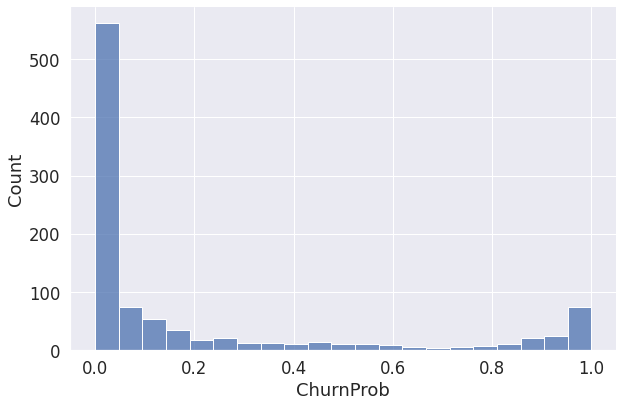

In [79]:
# 2. Visualize the distribution of Churn Probabilities 
sns.set(font_scale = 1.5)
sns.displot(NewCustomers, x="ChurnProb", height=6, aspect=1.5)

### 10.3.3 Investigate Bank Revenue at Risk
One possibility: For each customer calculate `ChurnProb` $\times$ `BnkRev`

In [80]:
# 1. Calculate new Variable RevAtRisk
NewCustomers['RevAtRisk']=NewCustomers['ChurnProb'] * NewCustomers['BnkRev']

# 2. Describe Revenue at Risk
NewCustomers.RevAtRisk.describe()

count    1000.000000
mean      348.732148
std       669.096789
min       -23.280000
25%         0.000000
50%        20.216312
75%       280.946413
max      3169.108879
Name: RevAtRisk, dtype: float64

In [81]:
# 3. What is the total revenue at risk?
NewCustomers.RevAtRisk.sum()

348732.1482184813

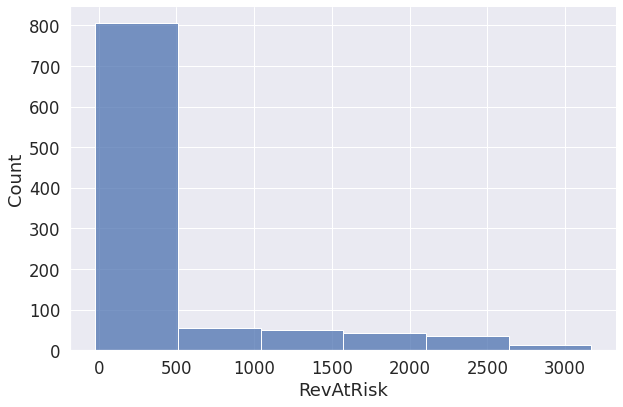

In [82]:
# 4. Visualize the distribution of Churn Probabilities 
sns.set(font_scale = 1.5)
sns.displot(NewCustomers, x="RevAtRisk", bins=6, height=6, aspect=1.5)

In [83]:
# 5. Look up the top 10 customers with highest revenue at risk
NewCustomers.sort_values(by=['RevAtRisk'], ascending=False, inplace=True)
NewCustomers.head(10)

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev,AtRisk,ChurnProb,RevAtRisk
803,61BOS20120MF14733552090892N,Mikko,Francisco,714,Boston,Male,51,161028.80,1,1,0,14856,0,0,3666,1,0.86446,3169.108879
469,61BOS20190MD75745705832275N,Matthes,Dexter,545,Boston,Male,55,134144.00,2,1,0,14115,0,0,3106,1,0.98000,3043.880000
512,91CHL20190SK83412124363316N,Sosa,Khadijah,694,Chapel Hill,Female,57,140435.20,2,1,0,9312,0,0,3088,1,0.98000,3026.240000
977,40ATL20110AC79826853672211N,Andreessen,Cecelia,731,Atlanta,Female,43,143567.20,3,1,1,17665,0,0,3500,1,0.86000,3010.000000
584,91CHL20190SJ67539183229128N,Swarn,Joesph,626,Chapel Hill,Male,41,118636.67,1,1,1,15410,0,0,2934,1,0.98000,2875.320000
116,40ATL20190HR20642693281247N,Houlihan,Ricki,730,Atlanta,Female,53,112639.20,3,1,1,16904,0,0,2859,1,1.00000,2859.000000
583,40ATL20190HS43024466777672N,Hill,Samuel,716,Atlanta,Male,45,113442.40,1,1,0,17837,0,0,2804,1,1.00000,2804.000000
908,61BOS20190RE68783210353295N,Ringuette,Earl,808,Boston,Male,61,121482.40,1,1,0,11914,0,0,2787,1,1.00000,2787.000000
767,61BOS20140LN64158524400089N,Lorah,Noah,760,Boston,Male,29,139957.60,4,1,0,10946,1,0,3228,1,0.86000,2776.080000
568,61BOS20190HB81606184591021N,Hostler,Bryon,781,Boston,Male,53,138069.60,2,0,0,2054,0,0,2761,1,1.00000,2761.000000


## 10.4 Where to from here?

1. **What managerial decisions might our Model inform?**
- Retention strategies: A customer churn model can help identify the customers who are at risk of leaving and the reasons behind their potential departure. This information can be used to develop targeted retention strategies that aim to address the specific needs and concerns of these customers. For example, if the model reveals that customers are leaving due to poor customer service, the bank could invest in improving its customer support system to reduce churn.
- Product and service offerings: The model can also provide insights into which products and services are most popular among customers and which ones are underperforming. Banks can use this information to adjust their offerings and marketing strategies to better meet the needs of their customers and keep them engaged.
- Customer segmentation: By grouping customers based on their behavior and preferences, the model can help banks identify the most profitable customer segments and tailor their offerings to those groups. For example, if the model reveals that a certain segment of customers is more likely to leave, the bank can offer them special promotions or discounts to encourage them to stay.
- Resource allocation: The model can also help banks allocate their resources more effectively. For example, if the model reveals that customers are leaving due to long wait times at the branch, the bank could invest in more staff or self-service options to reduce wait times.

2. **Are there other Variables to consider?**
- Economic conditions: The overall state of the economy can affect customers' financial stability and their decision to stay with a particular bank.
- Competitors: The level of competition in the industry and the actions of other banks may impact customer churn rates.
- Regulatory environment: Changes in regulations or laws may affect customer behavior and preferences.


3. **What are possible Limitations?**
- Data quality: The accuracy and completeness of the data used to develop the model can impact its effectiveness.
- Limited predictability: Customer behavior is complex and may be influenced by many factors, some of which may not be captured in the data or the model.


# 11. How well did we do?
Six months later, we know which customers churned (assuming that the bank did not implement any retention measures). 

***Let's go back and see how well our model predicted the churn of the new customers.***

In [84]:
# 1. Load outcome data and take a look
outcomes = pd.read_json("Bank_Churn_NewCustomers_Outcome.json")
outcomes.head()

,ClientID,Surname,Firstname,Terminated
0,40ATL20090WS41659688130478N,Wadhams,Sanford,0
1,40ATL20170FP60312547517267P,Fettig,Pennie,0
2,91CHL20170GT18583156644435N,Gaede,Todd,1
3,61BOS20190KR46667217568988N,Kruppa,Roberto,0
4,40ATL20170GE64239156077829P,Girad,Eddie,0


In [85]:
# 2. Get outcome variable
y = outcomes.Terminated

0.936
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       834
           1       0.78      0.86      0.82       166

    accuracy                           0.94      1000
   macro avg       0.88      0.90      0.89      1000
weighted avg       0.94      0.94      0.94      1000



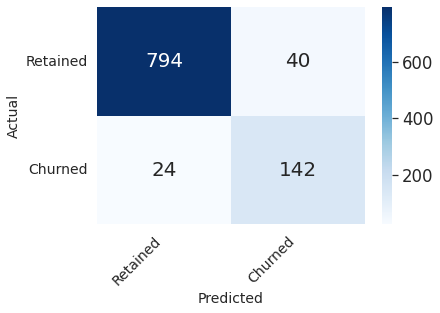

In [86]:
# 3. Evaluate our Model's predictions from 6 months ago
show_results(y, y_pred)

## 11.1 Where our Model failed to predict Churn


In [87]:
# 1. Sort our Data by its index to ensure that rows for prediction and truth are aligned
NewCustomers.sort_index(inplace=True)

# 2. Add Outcome to our NewCustomers dataframe
NewCustomers['Terminated']=y

# 3. Add variable for PredFailChurn (predicted not at risk, but ultimately churned)
NewCustomers['PredFailChurn']=(NewCustomers['Terminated']==1) & (NewCustomers['AtRisk']==0)

# 4. See where our Model fails:
NewCustomers[NewCustomers['PredFailChurn']==True].head(25)

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev,AtRisk,ChurnProb,RevAtRisk,Terminated,PredFailChurn
44,40ATL20130SJ98654279344220N,Sacchi,Joshua,611,Atlanta,Male,43,119487.2,1,0,0,6065,0,0,2390,0,0.479851,1146.844503,1,True
55,61BOS20160KD67109801056212N,Kernighan,Denver,798,Boston,Male,38,142616.8,1,1,0,6310,0,0,3042,0,0.388131,1180.695919,1,True
86,61BOS20120ET55779432659352N,Edmonds,Tonia,697,Boston,Female,43,322.4,1,0,0,14255,0,0,6,0,0.481827,2.890965,1,True
95,61BOS20160ZS79516264987649N,Zazueta,Stepanie,725,Boston,Female,24,0.0,1,1,1,13577,0,0,506,0,0.140833,71.261667,1,True
102,61BOS20100GB27969759094238N,Garbutt,Benito,411,Boston,Male,51,-336.0,1,1,1,11828,0,0,583,0,0.140000,81.620000,1,True
304,61BOS20110GA27030446150938N,Giroir,Allegra,791,Boston,Female,42,161.6,1,1,0,12018,0,0,364,0,0.429479,156.330515,1,True
336,91CHL20180AC59354107633282N,Antona,Coral,564,Chapel Hill,Female,38,55323.2,1,1,0,17713,0,0,1638,0,0.442000,723.996000,1,True
398,91CHL20150PM96546518700882N,Pedley,Martine,773,Chapel Hill,Female,40,152693.6,1,1,0,9339,0,0,3334,0,0.408136,1360.726296,1,True
417,61BOS20110BR92865759807210N,Barillari,Rosy,743,Boston,Female,39,0.0,1,1,1,13562,0,0,506,0,0.319813,161.825509,1,True
448,61BOS20130SD33798197504662N,Salk,Don,722,Boston,Male,45,149992.0,1,1,1,3094,0,0,3192,0,0.283333,904.400000,1,True


## 11.2 Impact of Model Failure

Up to how much revenue might the bank lose because our model failed to identify customers that are at risk of churning?

In [88]:
# 1. Sum BnkRev for Customers where we failed to predict that they will churn
print(f"Lost revenue of churned customers that we failed to identify: $ {NewCustomers[NewCustomers['PredFailChurn']==True]['BnkRev'].sum()}")

Lost revenue of churned customers that we failed to identify: $ 42482


# 12. What Next?
1. How to fix Model failure?  

2. Predictions for new Customers?  

3. Update Predictions?  


In [89]:
# # 1. Start by loading and pre-processing our data
# df = pd.read_json("Bank_Churn_Train.json")
# df = PrePipe(df, drop_dummy=True)

# # 2. Separate our target and input variables. 
# y = df.Terminated
# X = df.drop(columns=['Terminated'])

# # 3. split sample into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# # 4. Check if data have right shape
# print("Train: Response Variable: ",y_train.shape)
# print("Train: Feature Variables: ",X_train.shape)
# print("Test: Response Variable: ",y_test.shape)
# print("Test: Feature Variables: ",X_test.shape)

# 3 Check Class Balance
print(y_train.value_counts())

0    12709
1     4086
Name: Terminated, dtype: int64


In [90]:
# 1. Import libraries
from sklearn.utils import resample

# 2. Create a copy of our training data frame and add lables to it
up = X_train.copy()
up["y"]=y_train

# 3. Check Class Imbalance
print(up["y"].value_counts()) #fewer observations in category 0 (No Loan), so try to upsample category 0 to make a more balanced dataset

# 4. Split the observations by class
Loan = up[up["y"] == 1] #split the classes
No_Loan = up[up["y"] == 0]#split the classes

# 5. Sample (with replacement) minority class observations
No_Loan_upsample = resample(Loan,replace=True,n_samples=len(No_Loan),random_state=23) #upsampling to create balanced dataset

# 6. Concatenate dataframes again to make upsampled training data
up = pd.concat([No_Loan, No_Loan_upsample])

# 7. Purge temporary dataframes
Loan=[]
No_Loan=[]

# 8. Create upsampled X and y dataframes
X_up=up.drop(columns = "y").copy()
y_up=up['y']

# 9. Check if data have right shape and that classes are balanced
print("y_up: Response Variable: ",y_up.shape)
print("X_up: Feature Variables: ",X_up.shape)
print(y_up.value_counts())

0    12709
1     4086
Name: y, dtype: int64
y_up: Response Variable:  (25418,)
X_up: Feature Variables:  (25418, 16)
0    12709
1    12709
Name: y, dtype: int64


In [91]:
# 1 Let's tune the Hyperparameters of a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# 2 Instantiate Model (i.e., define it)
rfup = RandomForestClassifier(n_estimators = 50, max_depth = 5, max_features = 7, random_state=23)

# 3 Fit Model on Upsampled Training Data
rfup.fit(X_up, y_up)

# 4 Make Prediction on test data
y_pred = rfup.predict(X_test)

# 5 Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Train: Accuracy {round(accuracy_score(y_up, rfup.predict(X_up))*100,2)}%  Precision {round(precision_score(y_up, rfup.predict(X_up))*100,2)}%  Recall {round(recall_score(y_up, rfup.predict(X_up))*100,2)}%")
print(f"Test:  Accuracy {round(accuracy_score(y_test, y_pred)*100,2)}%  Precision {round(precision_score(y_test, y_pred)*100,2)}%  Recall {round(recall_score(y_test, y_pred)*100,2)}%")

Train: Accuracy 86.43%  Precision 83.17%  Recall 91.34%
Test:  Accuracy 83.38%  Precision 60.6%  Recall 90.58%


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5447
           1       0.61      0.91      0.73      1751

    accuracy                           0.83      7198
   macro avg       0.79      0.86      0.80      7198
weighted avg       0.88      0.83      0.84      7198



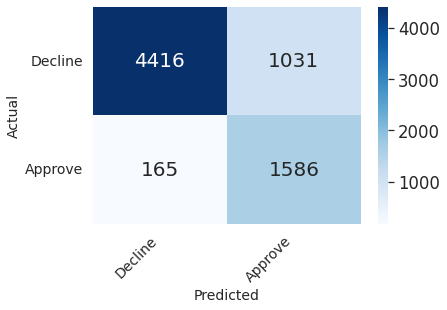

In [92]:
# 2 Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 3 Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 3a Create a function that visualizes the confusion matrix
def viz_conf_mat(y_test, y_pred):
  con_matrix = confusion_matrix(y_test, y_pred)
  confusion_matrix_df = pd.DataFrame(con_matrix, ('Decline', 'Approve'), ('Decline', 'Approve'))
  heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
  plt.ylabel('Actual', fontsize = 14)
  plt.xlabel('Predicted', fontsize = 14)

# 3b Call function to visaulize the confusiton matrix
viz_conf_mat(y_test, y_pred)

In [97]:
# 2. Get outcome variable
y = df.Terminated

In [102]:
# 1. Sort our Data by its index to ensure that rows for prediction and truth are aligned
df.sort_index(inplace=True)

# 2. Add Outcome to our NewCustomers dataframe
df['Terminated']=y

# 3. Add variable for PredFailChurn (predicted not at risk, but ultimately churned)
df['PredFailChurn']=(df['Terminated']==1)

# 4. See where our Model fails:
df[df['PredFailChurn']==True].count()

ClientID               166
Surname                166
Firstname              166
FICOScore              166
Subsidiary             166
Gender                 166
Age                    166
Balance                166
Products               166
BankCC                 166
Active                 166
RegDeposits            166
LifeInsur              166
PlatStatus             166
BalanceDepositRatio    166
Year                   166
Tenure                 166
TenureByAge            166
FICOScoreGivenAge      166
Terminated             166
PredFailChurn          166
dtype: int64

In [106]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset into a Pandas dataframe
df 

# Separate the minority and majority classes
minority = df[df.Terminated == 1]
majority = df[df.Terminated == 0]

# Upsample the minority class using Random Oversampling
minority_upsampled = resample(minority,
                              replace=True,     # Sample with replacement
                              n_samples=len(majority),  # Match number of samples in majority class
                              random_state=42)  # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
upsampled = pd.concat([majority, minority_upsampled])

# Display the class distribution after upsampling
print(upsampled.Terminated.value_counts())

# Now you can use the upsampled dataset for training your model

0    834
1    834
Name: Terminated, dtype: int64


In [107]:
# 1 Let's tune the Hyperparameters of a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# 2 Instantiate Model (i.e., define it)
rfup = RandomForestClassifier(n_estimators = 50, max_depth = 5, max_features = 7, random_state=23)

# 3 Fit Model on Upsampled Training Data
rfup.fit(X_up, y_up)

# 4 Make Prediction on test data
y_pred = rfup.predict(X_test)

# 5 Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Train: Accuracy {round(accuracy_score(y_up, rfup.predict(X_up))*100,2)}%  Precision {round(precision_score(y_up, rfup.predict(X_up))*100,2)}%  Recall {round(recall_score(y_up, rfup.predict(X_up))*100,2)}%")
print(f"Test:  Accuracy {round(accuracy_score(y_test, y_pred)*100,2)}%  Precision {round(precision_score(y_test, y_pred)*100,2)}%  Recall {round(recall_score(y_test, y_pred)*100,2)}%")

Train: Accuracy 86.43%  Precision 83.17%  Recall 91.34%
Test:  Accuracy 83.38%  Precision 60.6%  Recall 90.58%


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5447
           1       0.61      0.91      0.73      1751

    accuracy                           0.83      7198
   macro avg       0.79      0.86      0.80      7198
weighted avg       0.88      0.83      0.84      7198



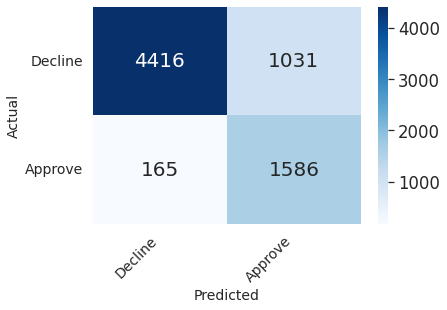

In [108]:
# 2 Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 3 Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 3a Create a function that visualizes the confusion matrix
def viz_conf_mat(y_test, y_pred):
  con_matrix = confusion_matrix(y_test, y_pred)
  confusion_matrix_df = pd.DataFrame(con_matrix, ('Decline', 'Approve'), ('Decline', 'Approve'))
  heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
  plt.ylabel('Actual', fontsize = 14)
  plt.xlabel('Predicted', fontsize = 14)

# 3b Call function to visaulize the confusiton matrix
viz_conf_mat(y_test, y_pred)

# **Looking Ahead:**  

####**Next Class:** Thrsday, March 23, 2023

#### ***Algorithmic Bias*** 

#### **Read before class:** Read Lambrecht, A. and Tucker, C., 2019. [Algorithmic bias? An empirical study of apparent gender-based discrimination in the display of STEM career ads.](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2018.3093) Management Science, 65(7), pp.2966-2981.




# **Call for Nominations: Recognize a Professor for their Teaching** 

> **Put your Nomintations in before Monday, March 27th, 2023:** https://tinyurl.com/weatherspoon2023 

![Weatherspoon](https://mapxp.app/BUSI488/Weatherspoon2023.png)


This notebook was inspired by the following:  
https://github.com/soanems/bank-customer-churn-python/blob/master/Bank%20Customer%20Churn_2.ipynb  
https://www.kaggle.com/kmalit/bank-customer-churn-prediction  
https://academy.vertabelo.com/blog/python-customer-churn-prediction/  
http://dataskunkworks.com/2018/06/05/predicting-customer-churn-with-python-logistic-regression-decision-trees-and-random-forests/  
https://www.neuraldesigner.com/learning/examples/bank-churn  
https://www.kaggle.com/nasirislamsujan/bank-customer-churn-prediction?scriptVersionId=5729160  